# Assignment 5: Curve Fitting, Optimizations and finite difference methods



# Exercise 3: Taylor Series and Finite Difference Methods

An exploration of electrostatics, Taylor series and numerical difference methods

At iteration 1000 the error is:
Error mean: 0.24279972584565762
Error maximum: 0.3914405329822126
Error minimum: 0.0


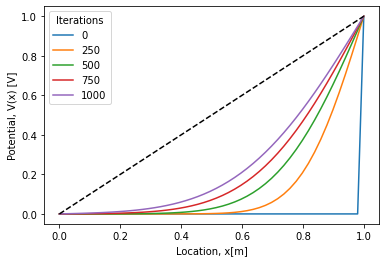

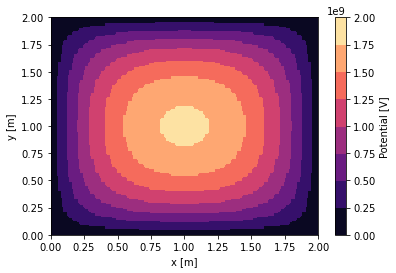

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import e, epsilon_0

# CONSTANTS ========================================================================

x = 1 #m
N = 100 #points
Vn = 1 #V
iterations = 1000
modulo = iterations/4

# RESULTS ==========================================================================

V = np.zeros((N,)) #Discretized
V[-1] = 1
x = np.linspace(0, x, N)
V_analytical = np.linspace(0, Vn, N)
fig, ax = plt.subplots()
for i in range(0, iterations+1, 1): #This is surprisingly fast
    Vnegi = V[0:-2] #Gets the interior values
    Vplusi = V[2:]
    V = (Vnegi + Vplusi)/2
    V = np.append(V, 1) #Adds back in boundary values
    V = np.append(0, V)
    if i % modulo == 0: # To control number of additions to the plot
        ax.plot(x, V, label=(str(i)))

ax.set_xlabel('Location, x[m]')
ax.set_ylabel('Potential, V(x) [V]')
ax.legend(title='Iterations')
ax.plot(x, V_analytical, linestyle='dashed', color='black') # Comparison
# ERROR ===========================================================================

error = abs(V-V_analytical)
print('At iteration', i, 'the error is:')
print('Error mean:', error.mean())
print('Error maximum:', error.max())
print('Error minimum:', error.min())

# BONUS ============================================================================
# CONSTANTS ========================================================================

L = 2 #length
q = 1 # charge. Change me to e and see lots of funky dots

charge_density = q/(L**2) # p, q over area
poisson_sol = -charge_density/epsilon_0 #right hand side of equation
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
h = (L/(N-1)) #our big Delta
X, Y = np.meshgrid(x, y)
#cite: http://www.damtp.cam.ac.uk/user/reh10/lectures/nst-mmii-chapter2.pdf
#4Vi,j = Vi+1,j + Vi-1,j + Vi,j+1 + Vi,j-1 + p/ep0*h^2
#^ I genuinely needed the extra understanding of this math because
# my math skills stand somewhere between a potato and a lemon
V = np.zeros(X.shape) #Zero grid
V[50, 50] = 1 #midpoint arbitrarily 1 for propagation

# RESULTS ==========================================================================

for i in range(0, iterations+1, 1):
    Vnegxi  = np.pad(V[0:-2],   ((2,0), (0, 0)), mode='constant') #Making them the same shape.
    Vplusxi = np.pad(V[2:],     ((0,2), (0, 0)), mode='constant') #And shunting them as I need
    Vnegyi  = np.pad(V[:,0:-2], ((0,0), (2, 0)), mode='constant') #Like, drop two from one side
    Vplusyi  = np.pad(V[:,2:],  ((0,0), (0, 2)), mode='constant') #add two zero's to the other
    V = (Vnegxi + Vplusxi + Vnegyi + Vplusyi - poisson_sol*h**2)/4 #math!
    V = np.pad(V[1:-1, 1:-1], ((1, 1), (1, 1)), mode='constant') #Re-setting boundary conditions

plt.figure() #So it doesn't overlap other figure
contour = plt.contourf(X, Y, V, cmap='magma') #Magma is lovely
plt.xlabel('x [m]')
plt.ylabel('y [m]')
clb = plt.colorbar(contour)
clb.set_label('Potential [V]')
plt.show()

# Description for plots in Exercise 3:

In the first plot, a 1d potential versus location, we see the ideal analytical version of the potential function with p/epsilon_0=0, yielding V=ax+b, as a dashed line. It's assumed that potential exists always at 1 at the very end of the location line (1m). Each approximation run at every end of 250 iterations of the averaging loop is plotted as seen. We can see that as the iterations increase, the approximation method explored gets closer and closer to the analytical version, with a substantial amount of error in the lower number of iterations. With enough iterations this could very well get 'close' to the analytical solution as even with 1000 iterations the error average is 25% of the analytical result and the worst error is approximately 40%. We can visually see that it is substantially worse in lower iterations, but higher ones are tending to 'bunch up', so it's apparent that there will be diminishing returns as more iterations are introduced. This is not unexpected; error will always be present as this is a third-order Taylor approximation and either more orders, more iterations or a better approximation may yield improved results. Still, with the amount of computation time required for this specific calculation, more iterations is more than an acceptable compromise.

In the second (bonus), we see a similar sort of plot but with the potential extended to a p/epsilon_0 not equalling zero in 2 dimensions (really 3, since we have effectively a height map), we see a point charge in the centre of the graph radiating outward to a potential of 0 at the grounded edge of the box. a square of 2x2 meters was chosen to represent the area involved, and we can see that the potential is extremely high in the centre and drops off to the zero of the grounded box. The same number of iterations were used to generate this plot as the 1d plot above, but as more iterations were introduced it did not substantially change the plot we see (Tested with 5000 iterations, looked pretty much the same, but with a slightly smaller centre).